In [1]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.1.0
Num GPUs Available:  1


In [2]:
import os
import cv2
import glob

import numpy as np
import matplotlib.pyplot as plt

from model import *
from data import *
from tqdm import tqdm
from datetime import datetime


import tensorflow as tf
tf.__version__

Using TensorFlow backend.


'2.1.0'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


In [4]:
import os 
import shutil

from tqdm import tqdm

path = '/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/train_roots/image'
path = '/root/notebooks/0858611-2/tooth_xray_segmention/unet_base/dataset/train_3class_white/image'

for file_name in tqdm(os.listdir(path), total = len(os.listdir(path))):
    #print(file_name)
    if os.path.isdir(os.path.join(path, file_name)):
        print(os.path.join(path, file_name))
        #shutil.move(path, path)
        #shutil.rmtree(os.path.join(path, file_name))
    try:
        new_file = os.path.join(path, file_name).replace('old','new')
        if os.path.exists(new_file):
            pass
        else:
            print(new_file)
    except:
        print('File check exist erreor!!')

shutil.rmtree

FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: '/root/notebooks/0858611-2/tooth_xray_segmention/unet_base/dataset/train_3class_white/image'

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [4]:
train_parent_folder = 'D:/Lab/PBL/buccal/buccal_furcation_train/'
model_save_path = 'model/buccal_furcation_bi_unet.hdf5'

In [11]:
now = datetime.now()
current_time = now.strftime("%Y/%m/%d_%H:%M")


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(3,train_parent_folder,'image','label',data_gen_args,save_to_dir = None)

model = unet()
model.load_weights(model_save_path)

model_checkpoint = ModelCheckpoint(model_save_path.format(datetime.now().strftime("%Y_%m_%d_%H_%M")), monitor='loss',verbose=1, save_best_only=True)

model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 121 images belonging to 1 classes.
Found 121 images belonging to 1 classes.
2000/2000 [==============================] - 265s 133ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00001: loss improved from inf to 0.00428, saving model to model/pretrain.hdf5
Epoch 2/5
2000/2000 [==============================] - 264s 132ms/step - loss: 0.0032 - accuracy: 0.9990

Epoch 00002: loss improved from 0.00428 to 0.00317, saving model to model/pretrain.hdf5
Epoch 3/5
2000/2000 [==============================] - 263s 132ms/step - loss: 0.0024 - accuracy: 0.9993

Epoch 00003: loss improved from 0.00317 to 0.00240, saving model to model/pretrain.hdf5
Epoch 4/5
2000/2000 [==============================] - 264s 132ms/step - loss: 0.0022 - accuracy: 0.9994

Epoch 00004: loss improved from 0.00240 to 0.00222, saving model to model/pretrain.hdf5
Epoch 5/5
2000/2000 [==============================] - 264s 132ms/step - loss: 0.0019 - accuracy: 0.9995

Epoch 00005: loss improved from 0.00222 

### Train with npy file

In [8]:
aug_path = 'D:/Lab/PBL/buccal/buccal_furcation_train/aug/'
imgs_train,imgs_mask_train = geneTrainNpy(aug_path, aug_path)
model = unet()
#model.load_weights("/root/notebooks/0858611-2/tooth_xray_segmention/unet_base/model/model_weight/tooth_weights_3class_white2020_06_08_19_36.hdf5")
model_checkpoint = ModelCheckpoint(model_save_path.format(datetime.now().strftime("%Y_%m_%d_%H_%M")), monitor='loss',verbose=1, save_best_only=True)

model.fit(imgs_train, imgs_mask_train, batch_size=2, epochs=5, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])
model.save(model_save_path)

Train on 64 samples, validate on 16 samples
Epoch 1/5
64/64 [==============================] - 4s 68ms/step - loss: 0.0484 - accuracy: 0.9821 - val_loss: 0.0278 - val_accuracy: 0.9969

Epoch 00001: loss improved from inf to 0.04843, saving model to model/buccal_furcation_bi_unet.hdf5
Epoch 2/5
64/64 [==============================] - 4s 56ms/step - loss: 0.0154 - accuracy: 0.9980 - val_loss: 0.0248 - val_accuracy: 0.9969

Epoch 00002: loss improved from 0.04843 to 0.01543, saving model to model/buccal_furcation_bi_unet.hdf5
Epoch 3/5
64/64 [==============================] - 4s 56ms/step - loss: 0.0134 - accuracy: 0.9980 - val_loss: 0.0227 - val_accuracy: 0.9969

Epoch 00003: loss improved from 0.01543 to 0.01343, saving model to model/buccal_furcation_bi_unet.hdf5
Epoch 4/5
64/64 [==============================] - 4s 56ms/step - loss: 0.0129 - accuracy: 0.9980 - val_loss: 0.0213 - val_accuracy: 0.9969

Epoch 00004: loss improved from 0.01343 to 0.01295, saving model to model/buccal_fur

### test your model and save predicted results

In [6]:
from model import *
from data import *
from datetime import datetime
from tqdm import tqdm

import os
import tensorflow as tf
tf.__version__

'2.1.0'

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


In [5]:
def ensemble_bin(img, model_list, flip_ = False):
    ensemble_final_result = np.zeros((img.shape[0], img.shape[1],1), dtype = 'float32')
    for index, model in enumerate(model_list):
        pr_img = model.predict(img)
        sqpr_img = np.squeeze(pr_img)
        ensemble_img = sqpr_img.copy()
        if flip_:
            imgp = np.squeeze(img)
            h_flip = cv2.flip(imgp, 1)
            h_flip = np.expand_dims(h_flip, axis=(0,3))
            pre_h_flip = model.predict(h_flip)
            pre_h_flip = np.squeeze(pre_h_flip)
            h_flip = cv2.flip(pre_h_flip, 1)

            v_flip = cv2.flip(imgp, 0)
            v_flip = np.expand_dims(v_flip, axis=(0,3))
            pre_v_flip = model.predict(v_flip)
            pre_v_flip = np.squeeze(pre_v_flip)
            v_flip = cv2.flip(pre_v_flip, 0)

            hv_flip = cv2.flip(imgp, -1)
            hv_flip = np.expand_dims(hv_flip, axis=(0,3))
            pre_hv_flip = model.predict(hv_flip)
            pre_hv_flip = np.squeeze(pre_hv_flip)
            hv_flip = cv2.flip(pre_hv_flip, -1)
            ensemble_img = (sqpr_img+h_flip+v_flip+hv_flip)/4
        ensemble_final_result = ensemble_final_result+ensemble_img
    ensemble_final_result = ensemble_final_result/(index+1)
    return np.expand_dims(np.where(ensemble_final_result > 0.5, 255, 0), axis=(0,3))

In [6]:
import os 
import shutil

import skimage.io as io
import skimage.transform as trans

from tqdm import tqdm

test_folder = "D:/Lab/PBL/buccal/buccal_furcation_train/image/"
test_folder_list = [f for f in os.listdir(test_folder) if f.endswith('.PNG')]

result_folder = "D:/Lab/PBL/buccal/buccal_furcation_train/result/"
model_save_path = "model/buccal_furcation_bi_unet.hdf5"

model = unet()
model.load_weights(model_save_path)
model_list = [model]
model_fit_img_size = (256,256)

#test_img_path_list = glob.glob(test_folder+'/*/*.PNG')

# for img_path in tqdm(test_img_path_list, total = len(test_img_path_list)):
for img_path in tqdm(test_folder_list, total = len(test_folder_list)):
    img = io.imread(test_folder + img_path,as_gray = True)
    targe_size = img.shape
    img = trans.resize(img,model_fit_img_size)
    img = np.expand_dims(img, axis=(0,3))
    img_esemble = ensemble_bin(img,model_list,flip_ = False)
    img_esemble = np.squeeze(img_esemble)
    #cv2.imwrite(result_folder+'/{}/{}'.format(img_path.split('/')[-2],img_path.split('/')[-1]),img_esemble)
    cv2.imwrite(result_folder+'{}'.format(img_path),img_esemble)

D:\Lab\PBL\buccal\unet\model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)
100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:04<00:00, 25.12it/s]


  0%|                                                                                          | 0/121 [00:00<?, ?it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ 158877 Patrica M Potter_190702_105537_B2D9F7.PNG
(256, 256, 3)


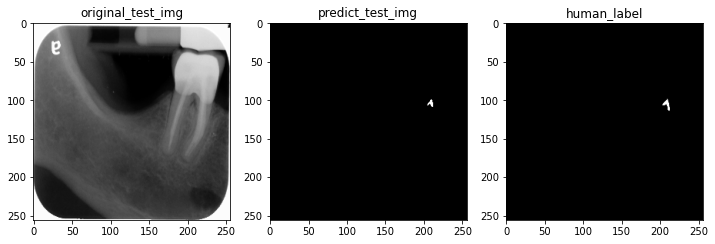

  1%|▋                                                                                 | 1/121 [00:00<00:34,  3.47it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ 158877 Patrica M Potter_190702_105541_B2D9F8.PNG
(256, 256, 3)


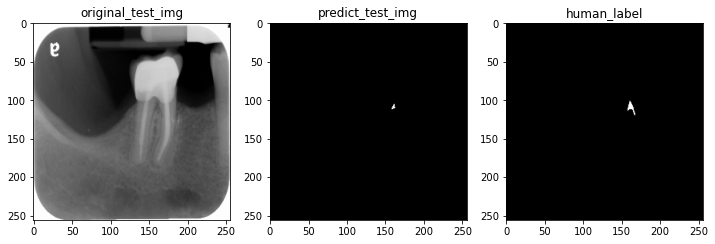

  2%|█▎                                                                                | 2/121 [00:00<00:33,  3.52it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090324_100755_C0AC17.PNG
(256, 256, 3)


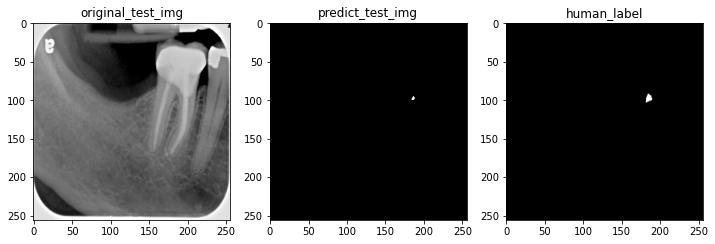

  2%|██                                                                                | 3/121 [00:00<00:33,  3.56it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090903_154100_C07488.PNG
(256, 256, 3)


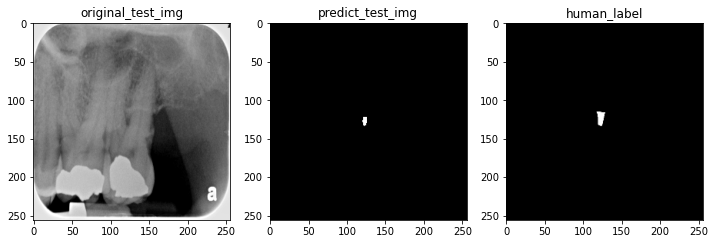

  3%|██▋                                                                               | 4/121 [00:01<00:32,  3.57it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090903_154103_C07484.PNG
(256, 256, 3)


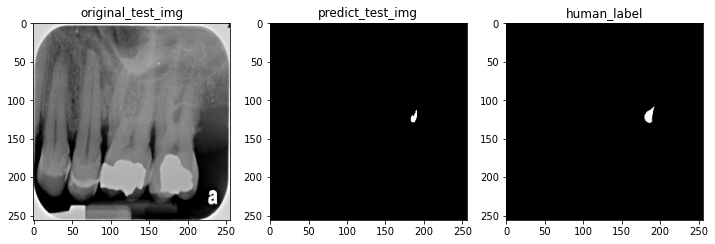

  4%|███▍                                                                              | 5/121 [00:01<00:32,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090903_154149_C0748C.PNG
(256, 256, 3)


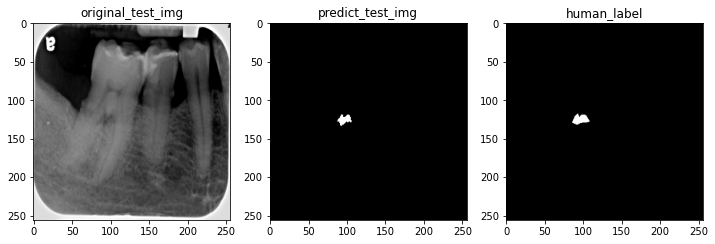

  5%|████                                                                              | 6/121 [00:01<00:31,  3.60it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090911_093744_160BEC.PNG
(256, 256, 3)


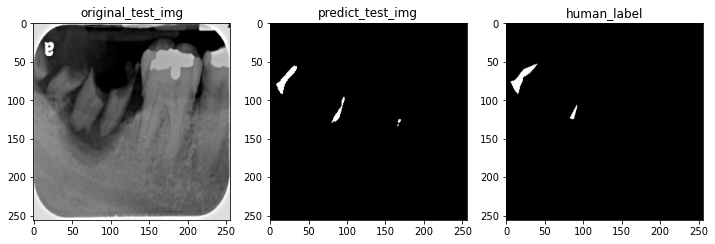

  6%|████▋                                                                             | 7/121 [00:02<00:34,  3.34it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090911_094546_160BE9.PNG
(256, 256, 3)


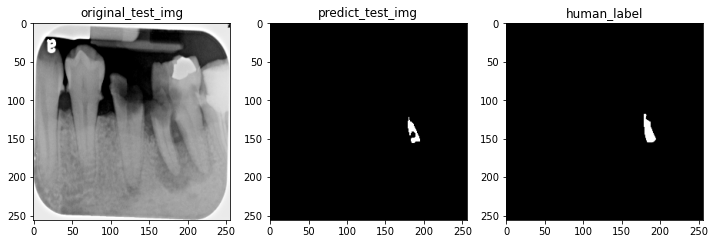

  7%|█████▍                                                                            | 8/121 [00:02<00:32,  3.42it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090911_094547_160BE6.PNG
(256, 256, 3)


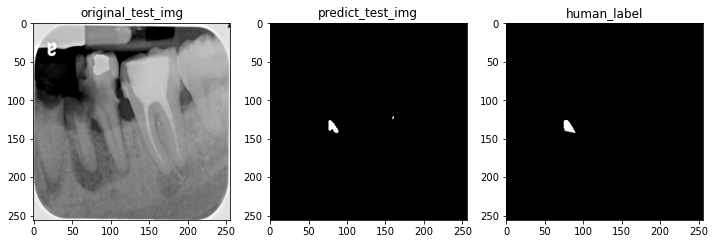

  7%|██████                                                                            | 9/121 [00:02<00:31,  3.53it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090911_100000_160BE5.PNG
(256, 256, 3)


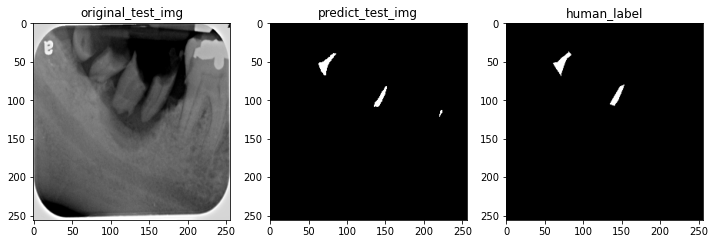

  8%|██████▋                                                                          | 10/121 [00:02<00:31,  3.56it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090911_100023_160BFE.PNG
(256, 256, 3)


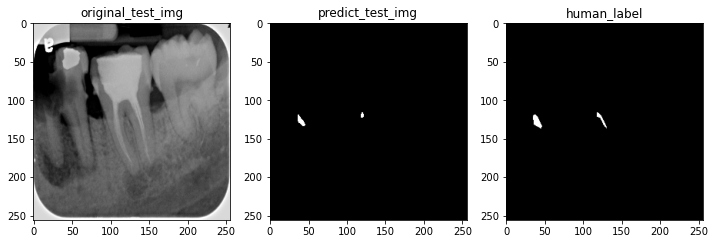

  9%|███████▎                                                                         | 11/121 [00:03<00:30,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090914_100204_A53396.PNG
(256, 256, 3)


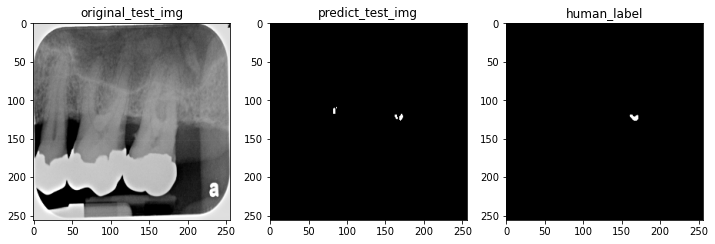

 10%|████████                                                                         | 12/121 [00:03<00:30,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090914_100210_A5339D.PNG
(256, 256, 3)


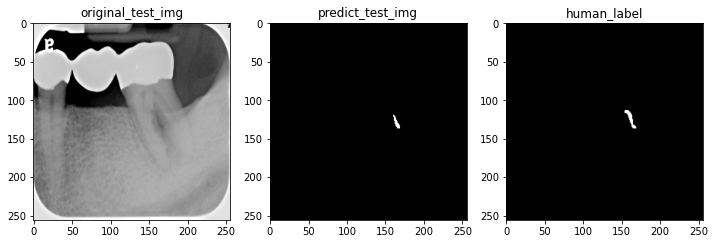

 11%|████████▋                                                                        | 13/121 [00:03<00:30,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090914_100230_A53399.PNG
(256, 256, 3)


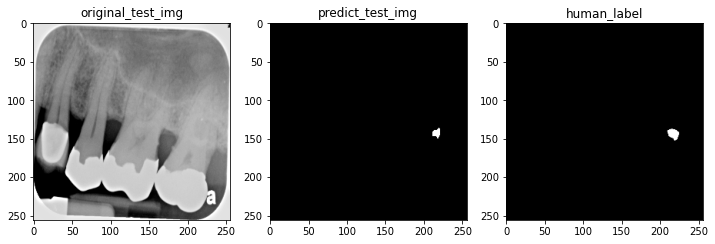

 12%|█████████▎                                                                       | 14/121 [00:03<00:29,  3.62it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090914_100256_A533A5.PNG
(256, 256, 3)


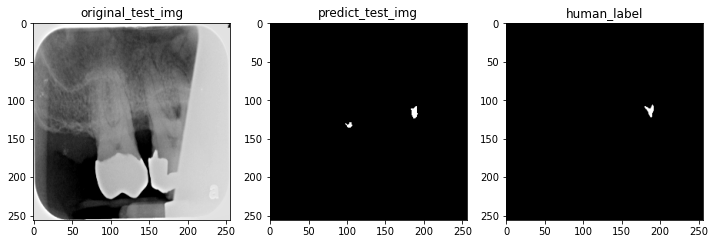

 12%|██████████                                                                       | 15/121 [00:04<00:29,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_090914_100328_A533A0.PNG
(256, 256, 3)


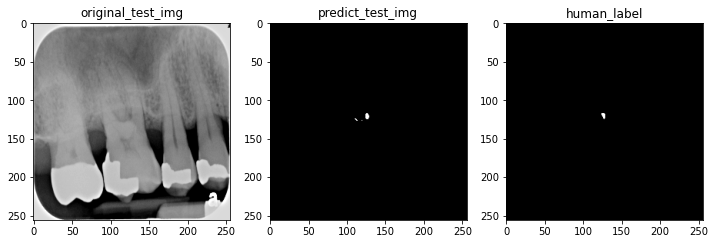

 13%|██████████▋                                                                      | 16/121 [00:04<00:29,  3.57it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_100330_104229_C0736C.PNG
(256, 256, 3)


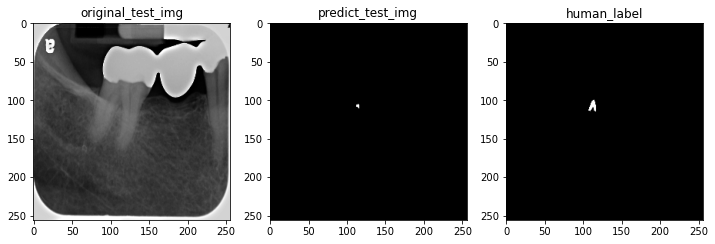

 14%|███████████▍                                                                     | 17/121 [00:04<00:31,  3.34it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_100825_111617_C03822.PNG
(256, 256, 3)


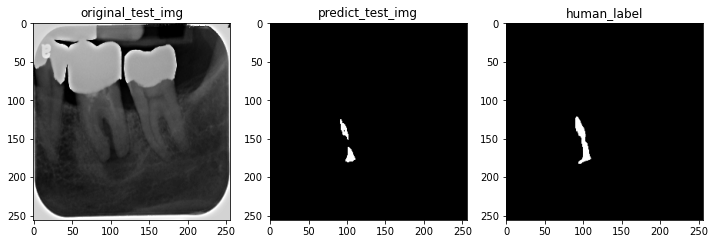

 15%|████████████                                                                     | 18/121 [00:05<00:30,  3.38it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_100825_111622_C03828.PNG
(256, 256, 3)


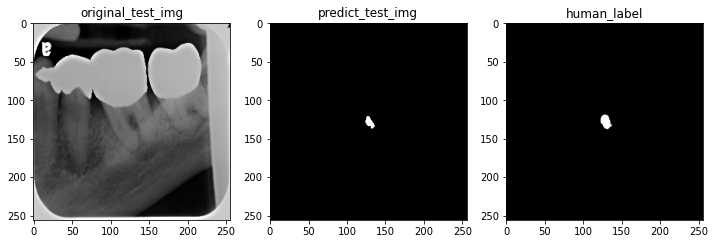

 16%|████████████▋                                                                    | 19/121 [00:05<00:29,  3.47it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120229_094927_C07402.PNG
(256, 256, 3)


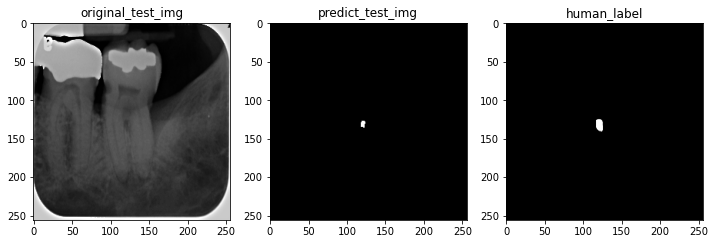

 17%|█████████████▍                                                                   | 20/121 [00:05<00:28,  3.52it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120229_095002_C0740A.PNG
(256, 256, 3)


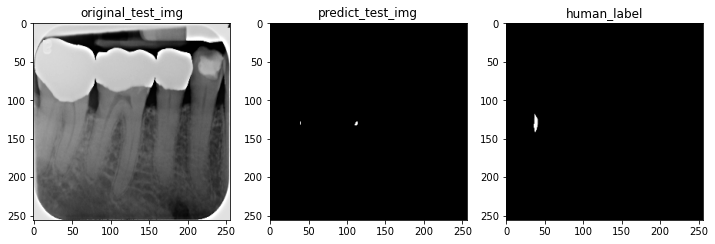

 17%|██████████████                                                                   | 21/121 [00:05<00:28,  3.54it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120823_103715_4AA86.PNG
(256, 256, 3)


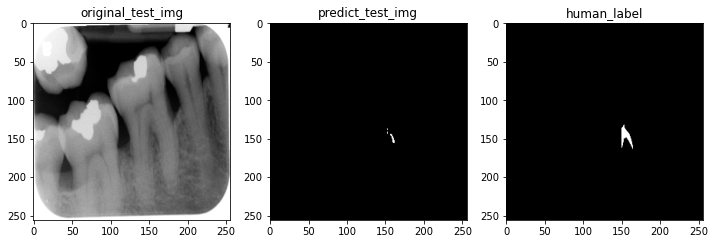

 18%|██████████████▋                                                                  | 22/121 [00:06<00:27,  3.60it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120827_095324_BFFF2E.PNG
(256, 256, 3)


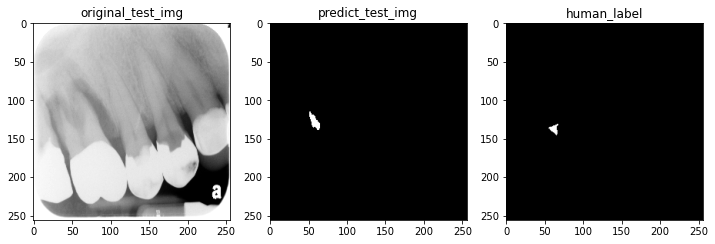

 19%|███████████████▍                                                                 | 23/121 [00:06<00:27,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120827_095333_BFFF2F.PNG
(256, 256, 3)


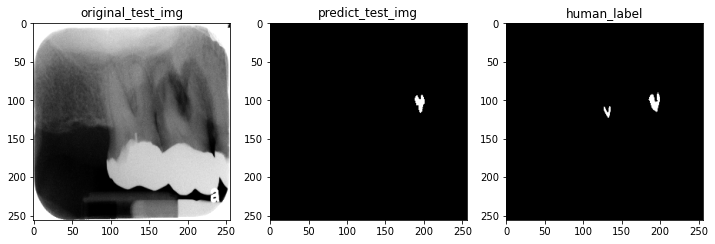

 20%|████████████████                                                                 | 24/121 [00:06<00:26,  3.63it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120827_095343_BFFF3C.PNG
(256, 256, 3)


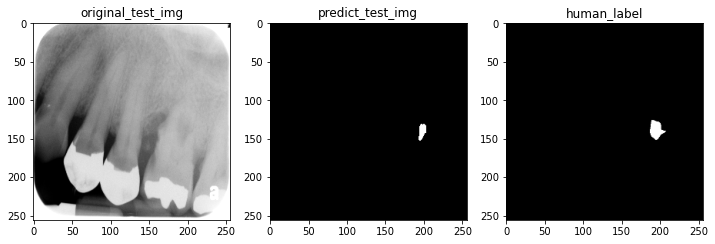

 21%|████████████████▋                                                                | 25/121 [00:07<00:26,  3.65it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120827_095409_BFFF2B.PNG
(256, 256, 3)


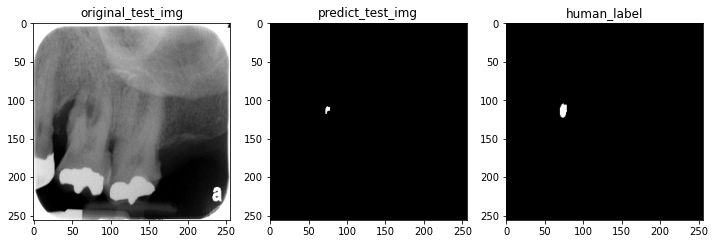

 21%|█████████████████▍                                                               | 26/121 [00:07<00:26,  3.62it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_120827_102506_BFFF2D.PNG
(256, 256, 3)


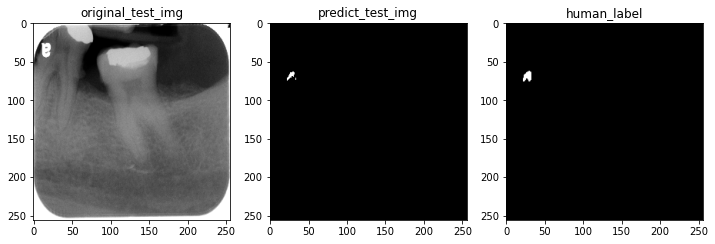

 22%|██████████████████                                                               | 27/121 [00:07<00:27,  3.36it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_121107_150707_C0A95F.PNG
(256, 256, 3)


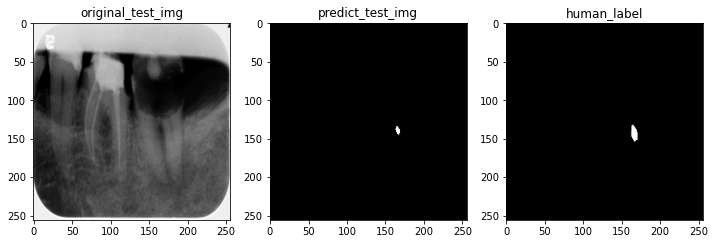

 23%|██████████████████▋                                                              | 28/121 [00:07<00:27,  3.42it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130226_111105_C054FB.PNG
(256, 256, 3)


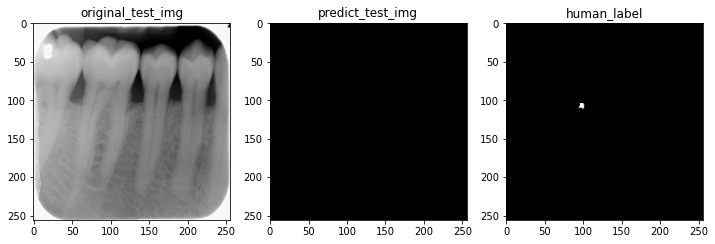

 24%|███████████████████▍                                                             | 29/121 [00:08<00:26,  3.48it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130226_111107_C0550B.PNG
(256, 256, 3)


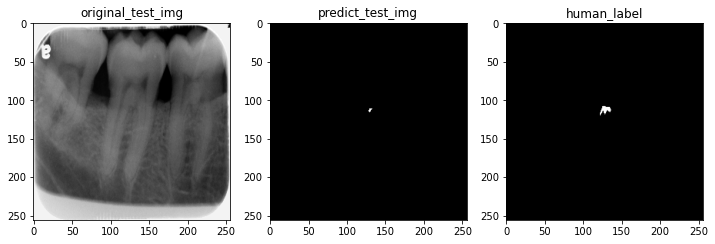

 25%|████████████████████                                                             | 30/121 [00:08<00:26,  3.49it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130226_111127_C05500.PNG
(256, 256, 3)


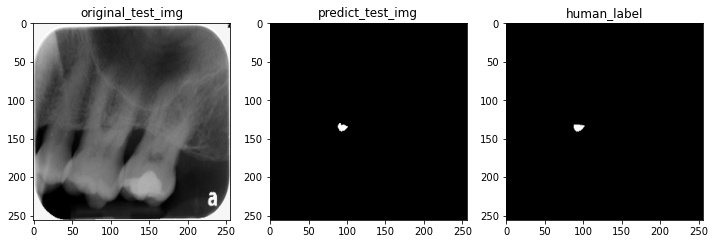

 26%|████████████████████▊                                                            | 31/121 [00:08<00:25,  3.50it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130226_113612_C054F9.PNG
(256, 256, 3)


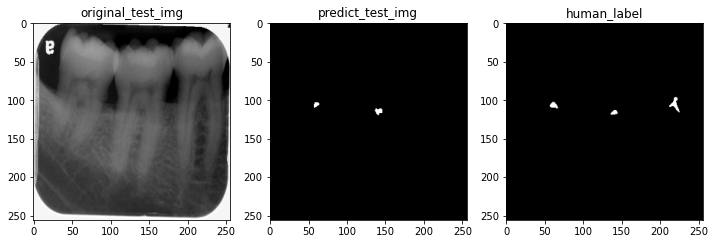

 26%|█████████████████████▍                                                           | 32/121 [00:09<00:25,  3.54it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130625_104542_C073F3.PNG
(256, 256, 3)


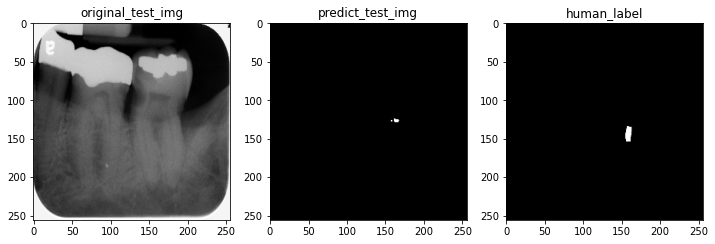

 27%|██████████████████████                                                           | 33/121 [00:09<00:24,  3.55it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130625_104605_C073ED.PNG
(256, 256, 3)


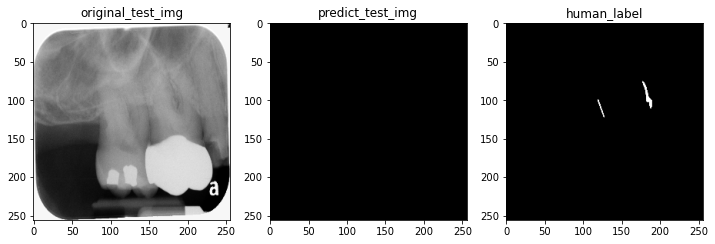

 28%|██████████████████████▊                                                          | 34/121 [00:09<00:24,  3.53it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130821_101425_C057C0.PNG
(256, 256, 3)


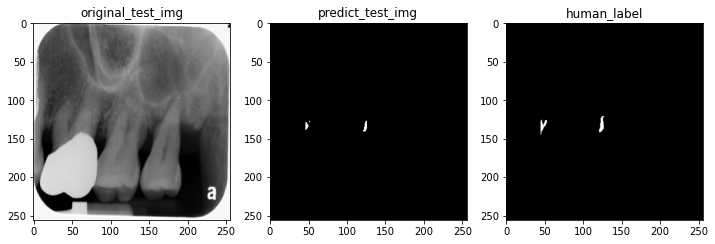

 29%|███████████████████████▍                                                         | 35/121 [00:09<00:24,  3.56it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130821_101502_C057B8.PNG
(256, 256, 3)


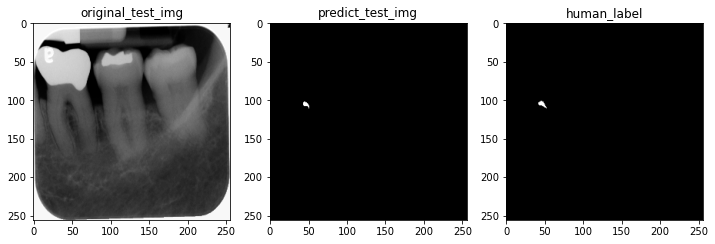

 30%|████████████████████████                                                         | 36/121 [00:10<00:23,  3.56it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130905_092003_4C0CD.PNG
(256, 256, 3)


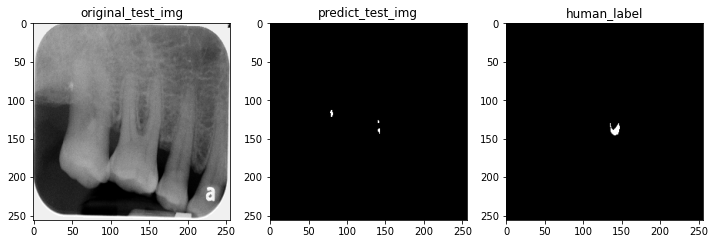

 31%|████████████████████████▊                                                        | 37/121 [00:10<00:25,  3.32it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_130905_092007_4C0C8.PNG
(256, 256, 3)


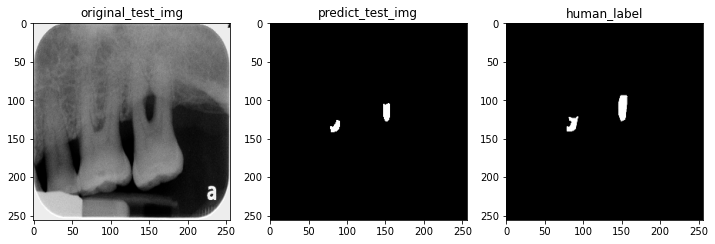

 31%|█████████████████████████▍                                                       | 38/121 [00:10<00:24,  3.41it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_131106_095450_AA575A.PNG
(256, 256, 3)


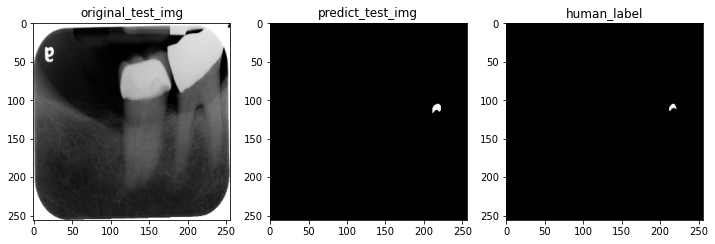

 32%|██████████████████████████                                                       | 39/121 [00:11<00:23,  3.44it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_151105_150612_2B1F71.PNG
(256, 256, 3)


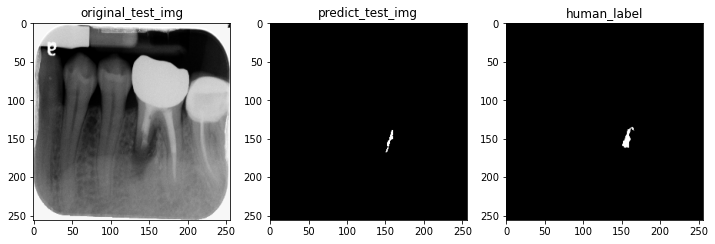

 33%|██████████████████████████▊                                                      | 40/121 [00:11<00:23,  3.49it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_151105_150641_2B1F5E.PNG
(256, 256, 3)


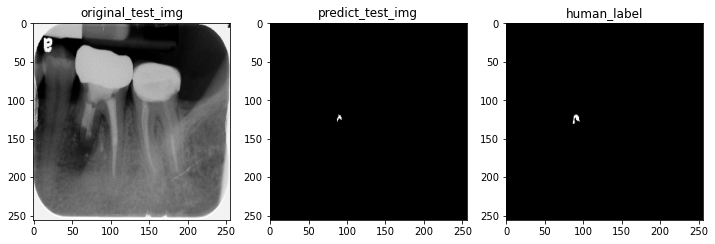

 34%|███████████████████████████▍                                                     | 41/121 [00:11<00:23,  3.46it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_160404_133928_C0AC2F.PNG
(256, 256, 3)


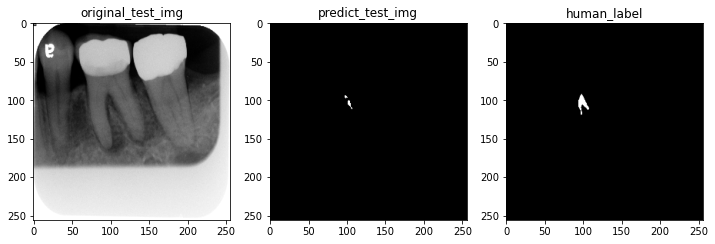

 35%|████████████████████████████                                                     | 42/121 [00:11<00:22,  3.49it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_160404_140813_C0AC3A.PNG
(256, 256, 3)


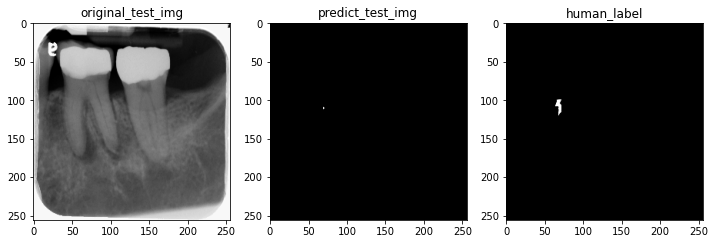

 36%|████████████████████████████▊                                                    | 43/121 [00:12<00:22,  3.54it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_160607_100605_C0AC71.PNG
(256, 256, 3)


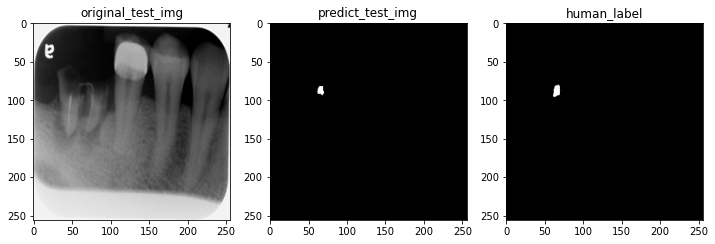

 36%|█████████████████████████████▍                                                   | 44/121 [00:12<00:21,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_160607_104722_C0AC6F.PNG
(256, 256, 3)


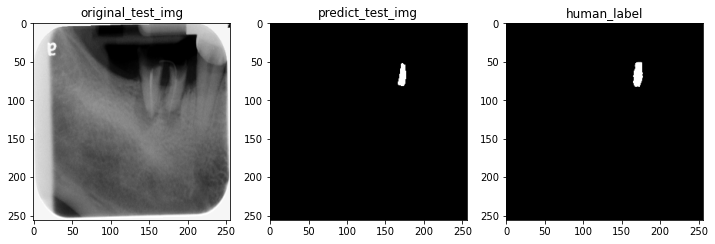

 37%|██████████████████████████████                                                   | 45/121 [00:12<00:21,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151559_C0AD5D.PNG
(256, 256, 3)


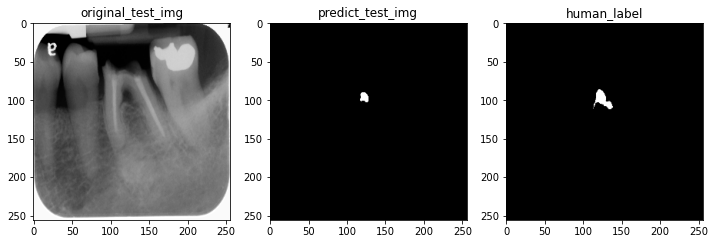

 38%|██████████████████████████████▊                                                  | 46/121 [00:13<00:20,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151607_C0AD6A.PNG
(256, 256, 3)


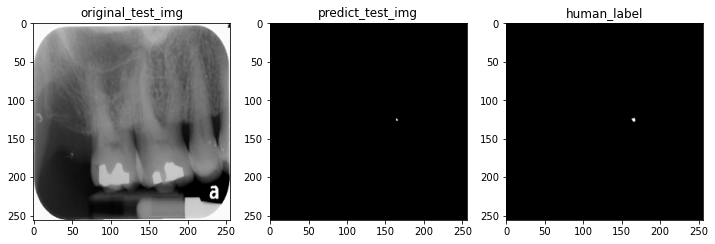

 39%|███████████████████████████████▍                                                 | 47/121 [00:13<00:21,  3.38it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151613_C0AD6D.PNG
(256, 256, 3)


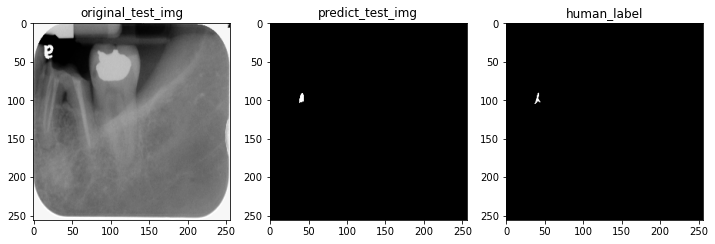

 40%|████████████████████████████████▏                                                | 48/121 [00:13<00:21,  3.39it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151627_C0AD63.PNG
(256, 256, 3)


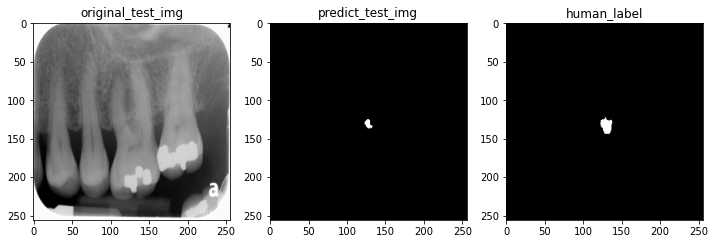

 40%|████████████████████████████████▊                                                | 49/121 [00:13<00:20,  3.44it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151636_C0AD6C.PNG
(256, 256, 3)


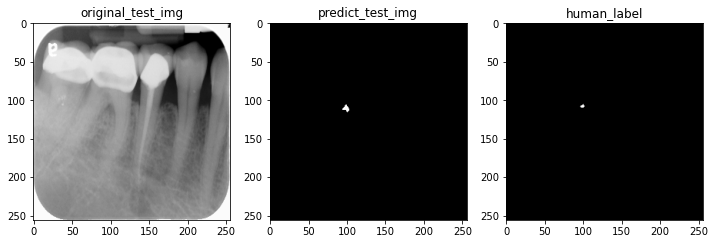

 41%|█████████████████████████████████▍                                               | 50/121 [00:14<00:20,  3.47it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151640_C0AD66.PNG
(256, 256, 3)


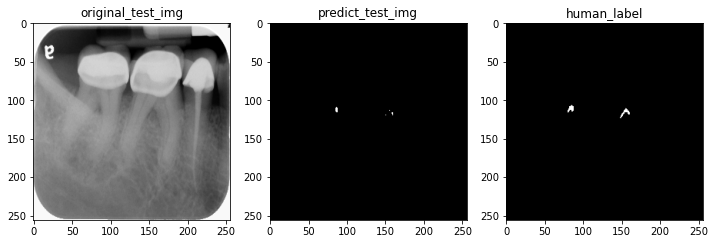

 42%|██████████████████████████████████▏                                              | 51/121 [00:14<00:20,  3.47it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_161122_151724_C0AD64.PNG
(256, 256, 3)


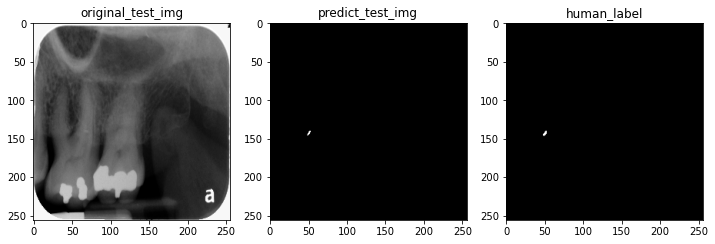

 43%|██████████████████████████████████▊                                              | 52/121 [00:14<00:19,  3.51it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170310_135215_C0A874.PNG
(256, 256, 3)


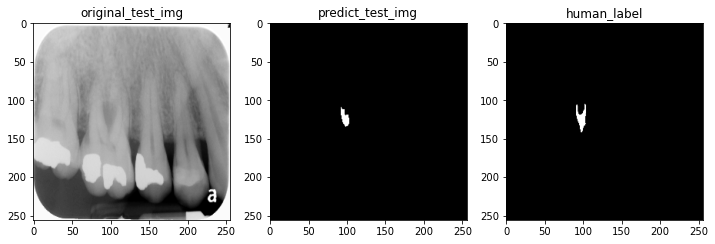

 44%|███████████████████████████████████▍                                             | 53/121 [00:15<00:19,  3.53it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170310_135220_C0A871.PNG
(256, 256, 3)


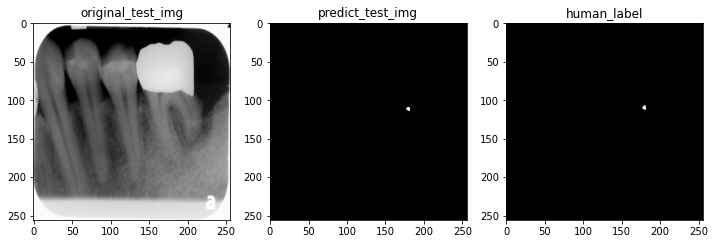

 45%|████████████████████████████████████▏                                            | 54/121 [00:15<00:18,  3.56it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170310_135306_C0A87A.PNG
(256, 256, 3)


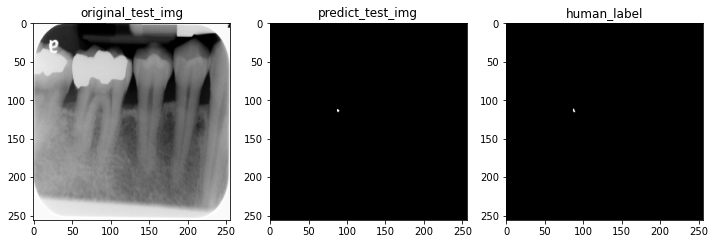

 45%|████████████████████████████████████▊                                            | 55/121 [00:15<00:18,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170310_135337_C0A86A.PNG
(256, 256, 3)


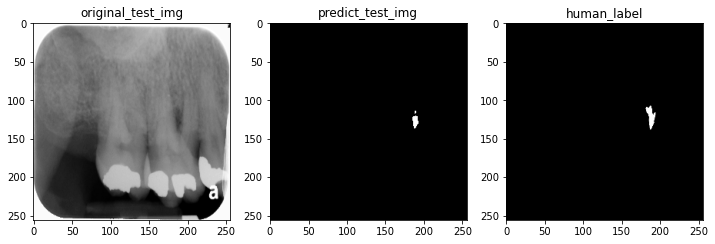

 46%|█████████████████████████████████████▍                                           | 56/121 [00:15<00:18,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170328_100605_9CADE5.PNG
(256, 256, 3)


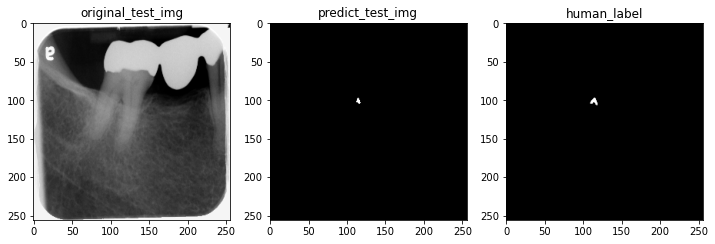

 47%|██████████████████████████████████████▏                                          | 57/121 [00:16<00:19,  3.33it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170619_152107_16F2FE.PNG
(256, 256, 3)


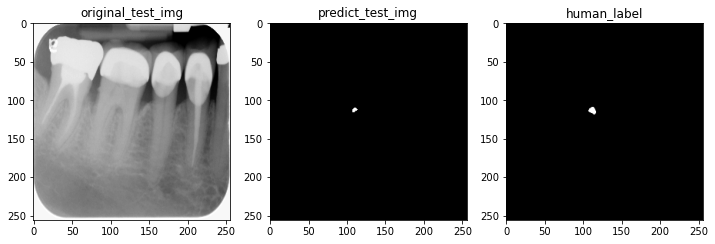

 48%|██████████████████████████████████████▊                                          | 58/121 [00:16<00:18,  3.44it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170619_155515_16F2EB.PNG
(256, 256, 3)


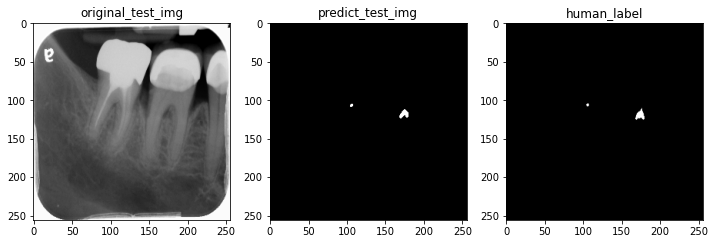

 49%|███████████████████████████████████████▍                                         | 59/121 [00:16<00:17,  3.48it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_170619_155628_16F2EC.PNG
(256, 256, 3)


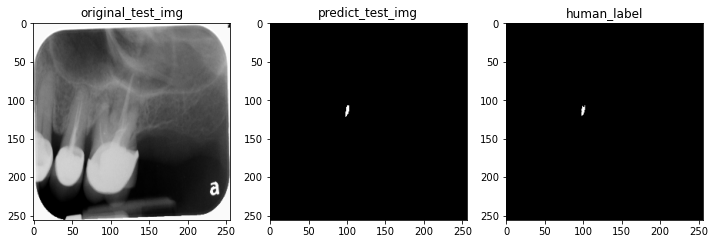

 50%|████████████████████████████████████████▏                                        | 60/121 [00:17<00:17,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180122_144929_16F0BA.PNG
(256, 256, 3)


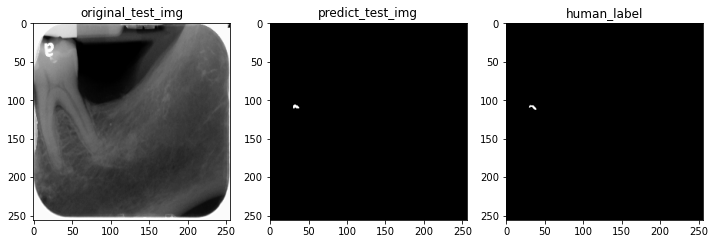

 50%|████████████████████████████████████████▊                                        | 61/121 [00:17<00:16,  3.57it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180607_082524_992419.PNG
(256, 256, 3)


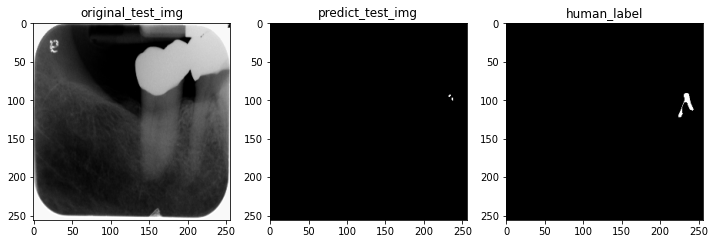

 51%|█████████████████████████████████████████▌                                       | 62/121 [00:17<00:16,  3.60it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180607_095007_99241D.PNG
(256, 256, 3)


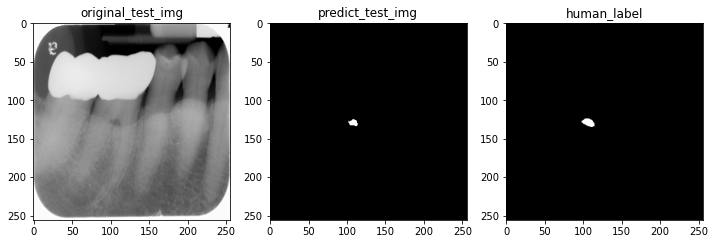

 52%|██████████████████████████████████████████▏                                      | 63/121 [00:17<00:16,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180615_085005_16F113.PNG
(256, 256, 3)


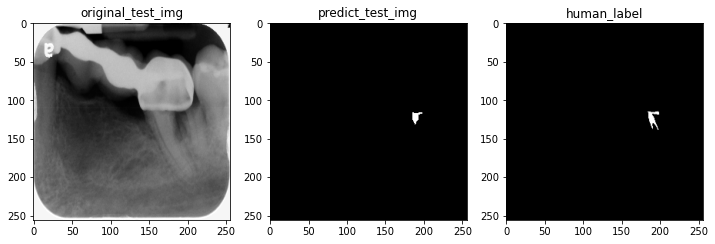

 53%|██████████████████████████████████████████▊                                      | 64/121 [00:18<00:15,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180615_114211_16F118.PNG
(256, 256, 3)


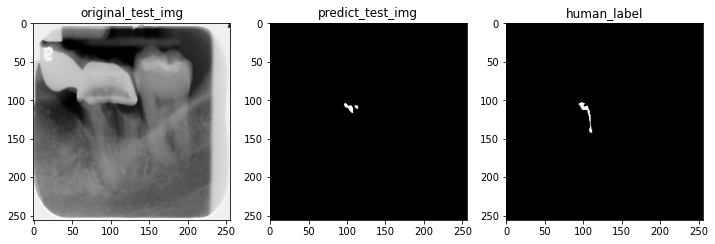

 54%|███████████████████████████████████████████▌                                     | 65/121 [00:18<00:15,  3.57it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180627_102949_16F1A4.PNG
(256, 256, 3)


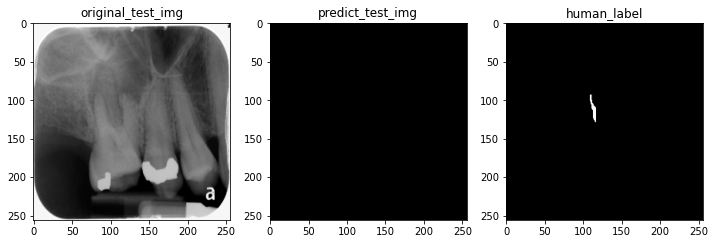

 55%|████████████████████████████████████████████▏                                    | 66/121 [00:18<00:15,  3.60it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180821_160705_16ED77.PNG
(256, 256, 3)


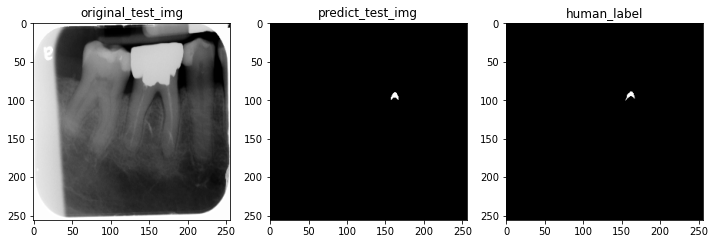

 55%|████████████████████████████████████████████▊                                    | 67/121 [00:19<00:15,  3.38it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180821_162224_16ED7C.PNG
(256, 256, 3)


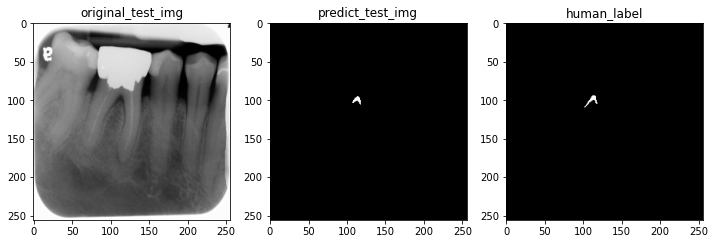

 56%|█████████████████████████████████████████████▌                                   | 68/121 [00:19<00:15,  3.45it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180821_162228_16ED79.PNG
(256, 256, 3)


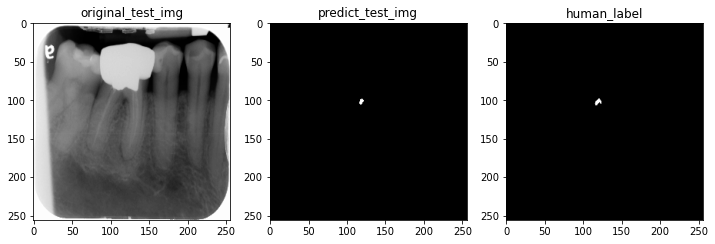

 57%|██████████████████████████████████████████████▏                                  | 69/121 [00:19<00:14,  3.53it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180823_101213_9A82AE.PNG
(256, 256, 3)


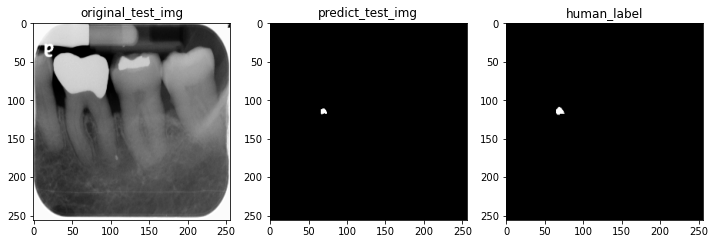

 58%|██████████████████████████████████████████████▊                                  | 70/121 [00:19<00:14,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180829_145353_16EB1B.PNG
(256, 256, 3)


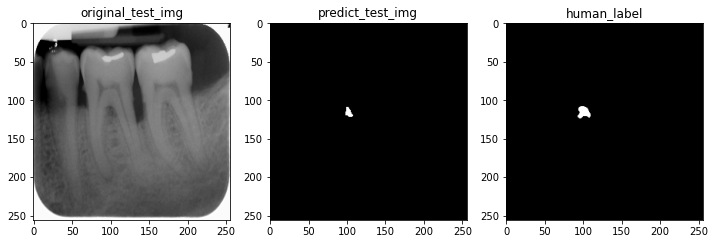

 59%|███████████████████████████████████████████████▌                                 | 71/121 [00:20<00:13,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180829_145355_16EB17.PNG
(256, 256, 3)


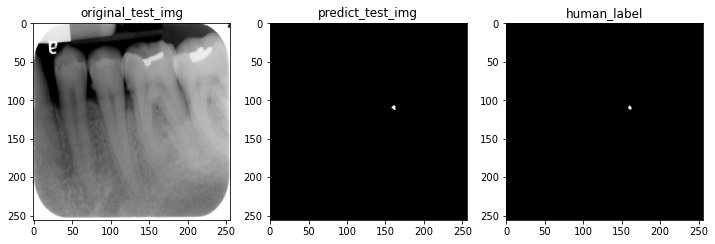

 60%|████████████████████████████████████████████████▏                                | 72/121 [00:20<00:13,  3.62it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180904_152608_16EB61.PNG
(256, 256, 3)


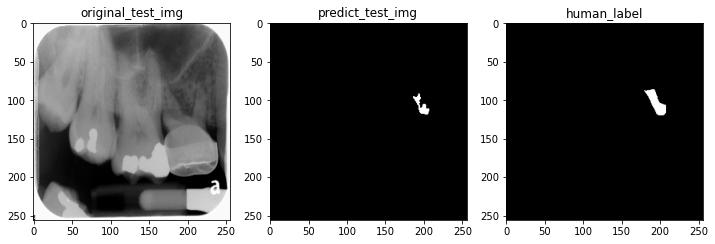

 60%|████████████████████████████████████████████████▊                                | 73/121 [00:20<00:13,  3.64it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180904_152642_16EB63.PNG
(256, 256, 3)


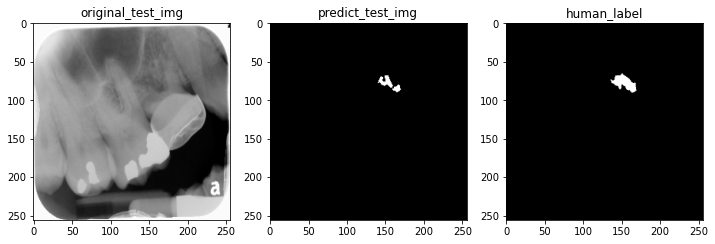

 61%|█████████████████████████████████████████████████▌                               | 74/121 [00:20<00:12,  3.62it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180904_154336_16EB4A.PNG
(256, 256, 3)


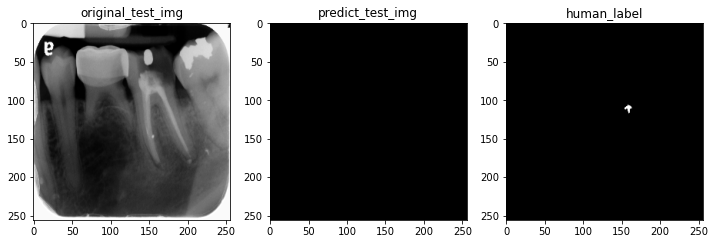

 62%|██████████████████████████████████████████████████▏                              | 75/121 [00:21<00:12,  3.63it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180904_154411_16EB44.PNG
(256, 256, 3)


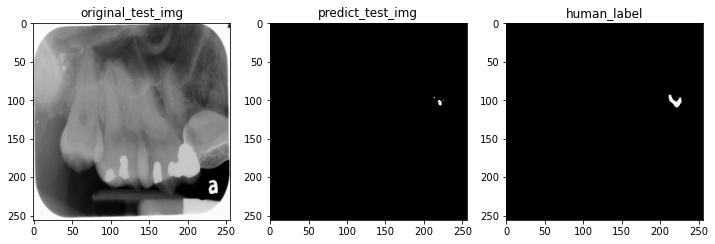

 63%|██████████████████████████████████████████████████▉                              | 76/121 [00:21<00:12,  3.63it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180910_154733_16E14B.PNG
(256, 256, 3)


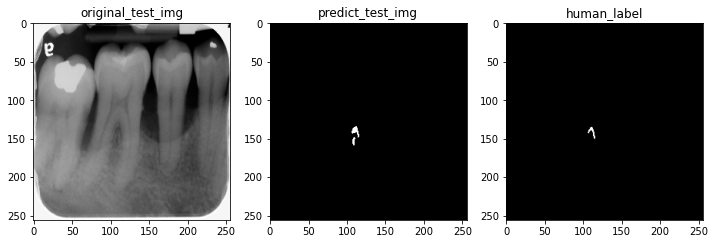

 64%|███████████████████████████████████████████████████▌                             | 77/121 [00:21<00:12,  3.45it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180910_154737_16E153.PNG
(256, 256, 3)


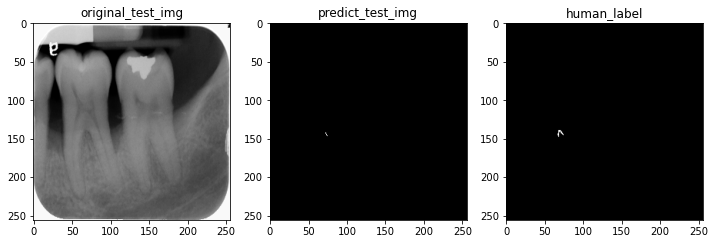

 64%|████████████████████████████████████████████████████▏                            | 78/121 [00:22<00:12,  3.46it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180910_154756_16E144.PNG
(256, 256, 3)


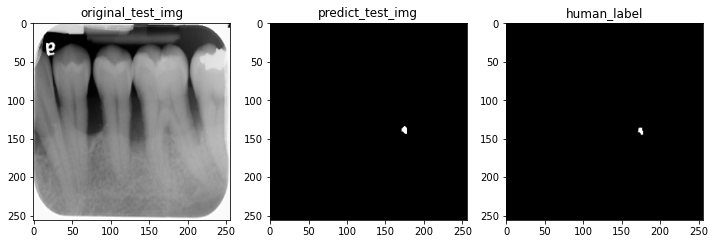

 65%|████████████████████████████████████████████████████▉                            | 79/121 [00:22<00:12,  3.45it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180910_154811_16E151.PNG
(256, 256, 3)


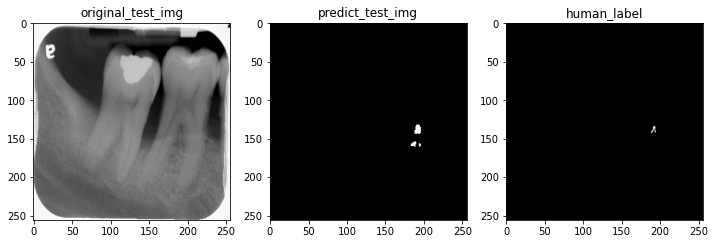

 66%|█████████████████████████████████████████████████████▌                           | 80/121 [00:22<00:11,  3.52it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180924_153933_160D09.PNG
(256, 256, 3)


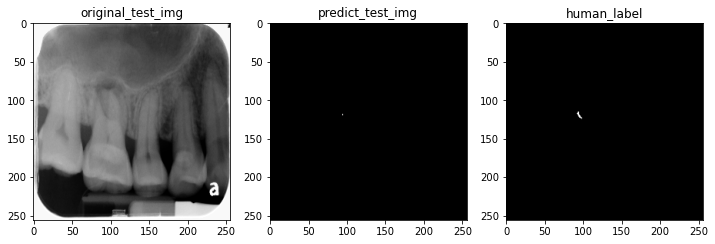

 67%|██████████████████████████████████████████████████████▏                          | 81/121 [00:22<00:11,  3.50it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_180924_153936_160CFC.PNG
(256, 256, 3)


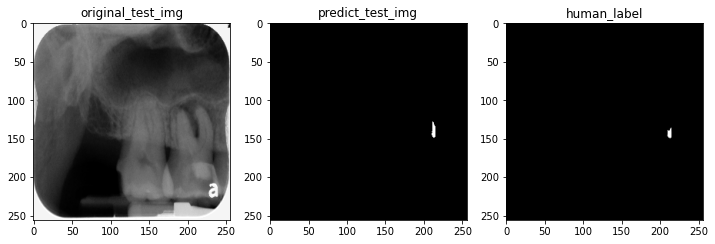

 68%|██████████████████████████████████████████████████████▉                          | 82/121 [00:23<00:11,  3.53it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_181017_160943_171A26.PNG
(256, 256, 3)


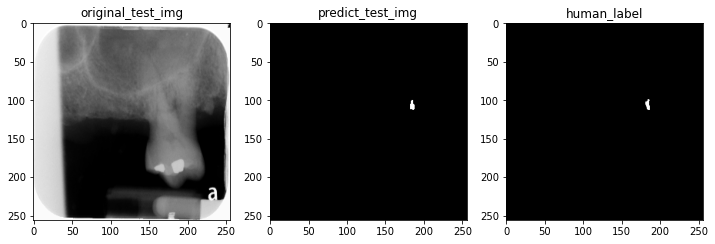

 69%|███████████████████████████████████████████████████████▌                         | 83/121 [00:23<00:10,  3.48it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_181017_160958_171A23.PNG
(256, 256, 3)


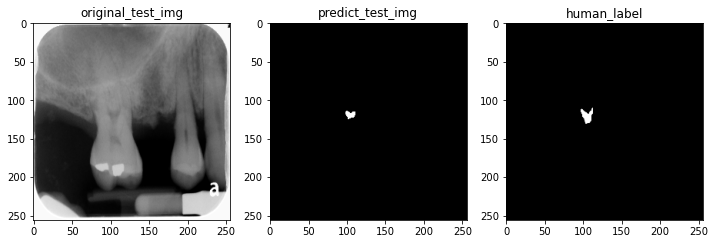

 69%|████████████████████████████████████████████████████████▏                        | 84/121 [00:23<00:10,  3.49it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_181017_161012_171A28.PNG
(256, 256, 3)


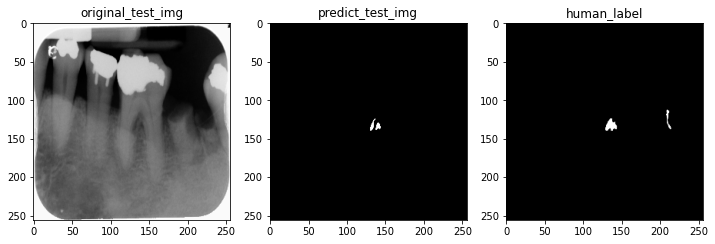

 70%|████████████████████████████████████████████████████████▉                        | 85/121 [00:24<00:10,  3.55it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_181017_161104_171A1A.PNG
(256, 256, 3)


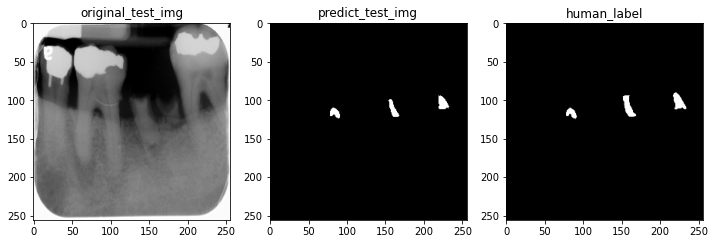

 71%|█████████████████████████████████████████████████████████▌                       | 86/121 [00:24<00:09,  3.60it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190201_142139_171A22.PNG
(256, 256, 3)


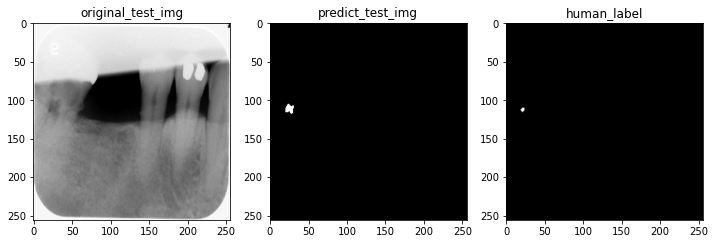

 72%|██████████████████████████████████████████████████████████▏                      | 87/121 [00:24<00:09,  3.44it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190201_142140_171A1F.PNG
(256, 256, 3)


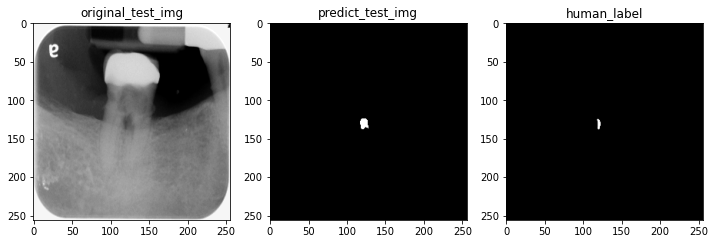

 73%|██████████████████████████████████████████████████████████▉                      | 88/121 [00:25<00:09,  3.46it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190227_094345_15BFFD.PNG
(256, 256, 3)


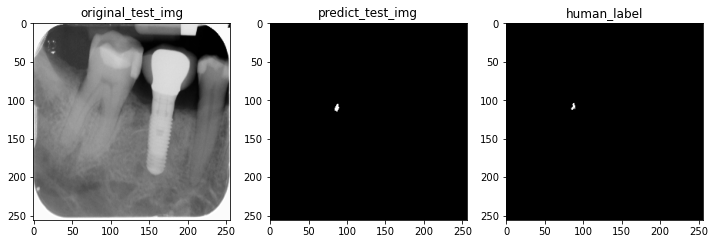

 74%|███████████████████████████████████████████████████████████▌                     | 89/121 [00:25<00:09,  3.34it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190305_151644_EB99B.PNG
(256, 256, 3)


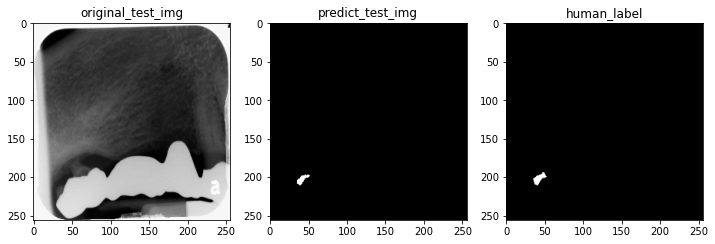

 74%|████████████████████████████████████████████████████████████▏                    | 90/121 [00:25<00:09,  3.39it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190305_151655_EB988.PNG
(256, 256, 3)


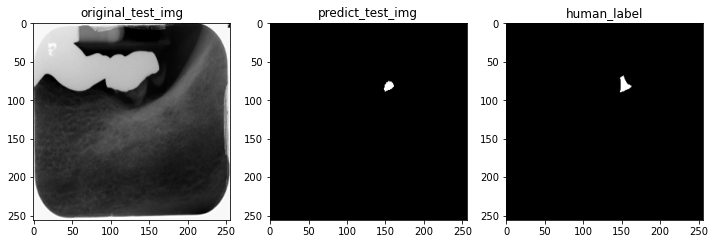

 75%|████████████████████████████████████████████████████████████▉                    | 91/121 [00:25<00:08,  3.35it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190305_151717_EB98D.PNG
(256, 256, 3)


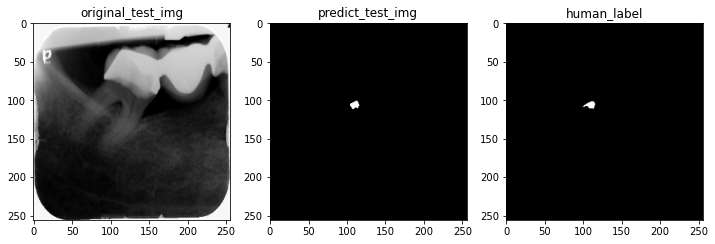

 76%|█████████████████████████████████████████████████████████████▌                   | 92/121 [00:26<00:08,  3.41it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190305_153134_EB9A4.PNG
(256, 256, 3)


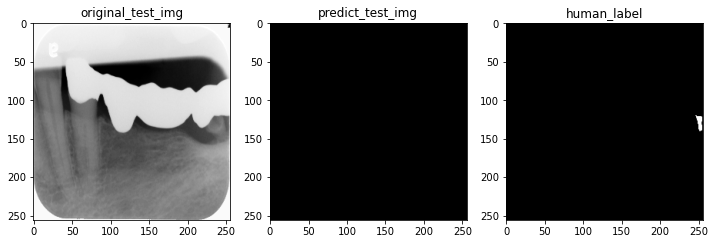

 77%|██████████████████████████████████████████████████████████████▎                  | 93/121 [00:26<00:08,  3.46it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190307_133739_4AB3D.PNG
(256, 256, 3)


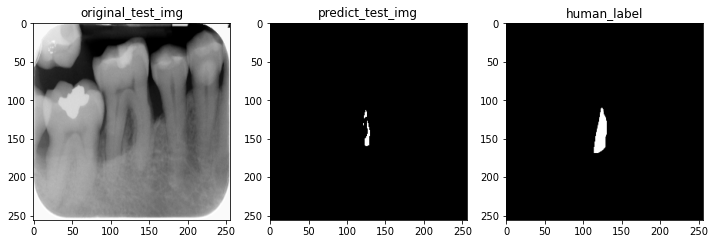

 78%|██████████████████████████████████████████████████████████████▉                  | 94/121 [00:26<00:07,  3.52it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190307_140336_4AB54.PNG
(256, 256, 3)


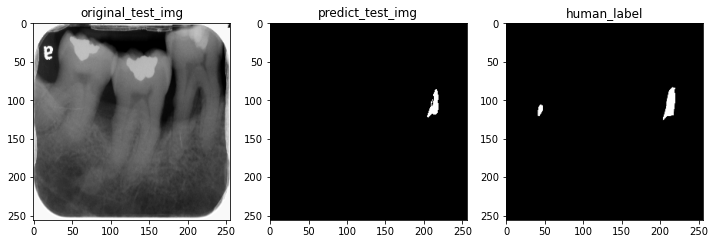

 79%|███████████████████████████████████████████████████████████████▌                 | 95/121 [00:27<00:07,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190619_104857_EA3E2.PNG
(256, 256, 3)


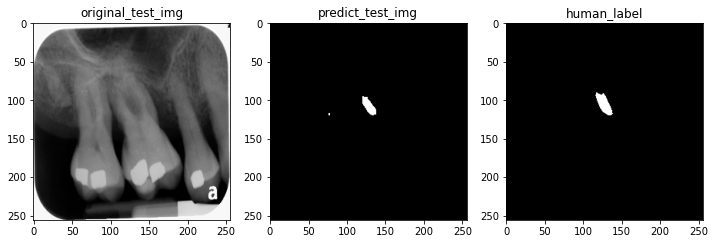

 79%|████████████████████████████████████████████████████████████████▎                | 96/121 [00:27<00:07,  3.57it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190619_104934_EA3E8.PNG
(256, 256, 3)


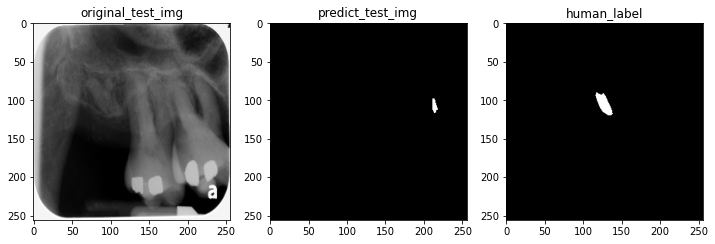

 80%|████████████████████████████████████████████████████████████████▉                | 97/121 [00:27<00:07,  3.33it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190710_111636_6A111.PNG
(256, 256, 3)


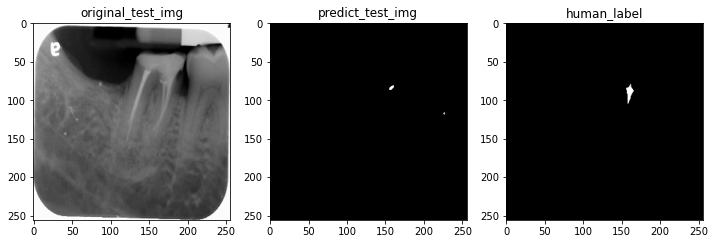

 81%|█████████████████████████████████████████████████████████████████▌               | 98/121 [00:27<00:06,  3.38it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153042_C055C3.PNG
(256, 256, 3)


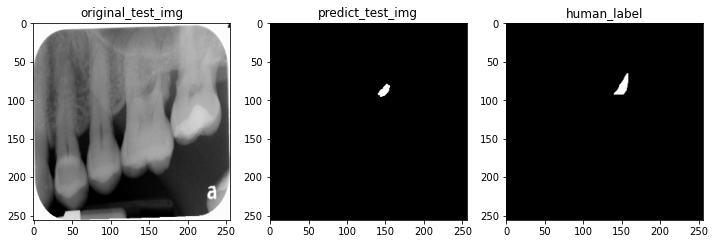

 82%|██████████████████████████████████████████████████████████████████▎              | 99/121 [00:28<00:06,  3.38it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153045_C055B5.PNG
(256, 256, 3)


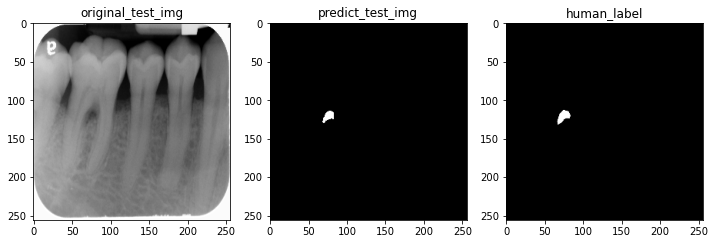

 83%|██████████████████████████████████████████████████████████████████              | 100/121 [00:28<00:06,  3.43it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153111_C055D1.PNG
(256, 256, 3)


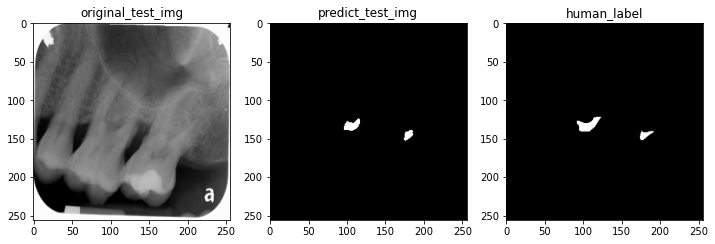

 83%|██████████████████████████████████████████████████████████████████▊             | 101/121 [00:28<00:05,  3.49it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153113_C055AE.PNG
(256, 256, 3)


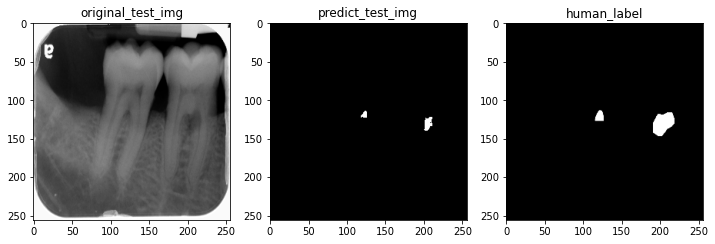

 84%|███████████████████████████████████████████████████████████████████▍            | 102/121 [00:29<00:05,  3.55it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153125_C055C7.PNG
(256, 256, 3)


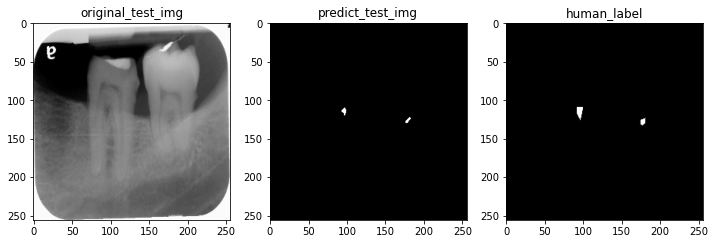

 85%|████████████████████████████████████████████████████████████████████            | 103/121 [00:29<00:05,  3.59it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153134_C055D4.PNG
(256, 256, 3)


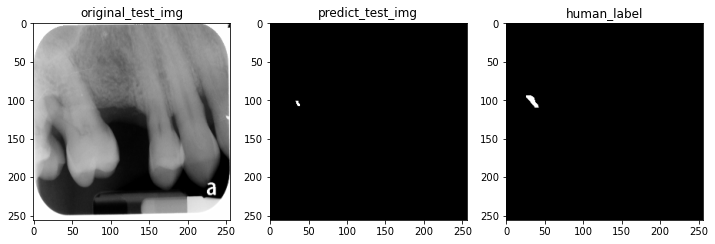

 86%|████████████████████████████████████████████████████████████████████▊           | 104/121 [00:29<00:04,  3.62it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153151_C055C5.PNG
(256, 256, 3)


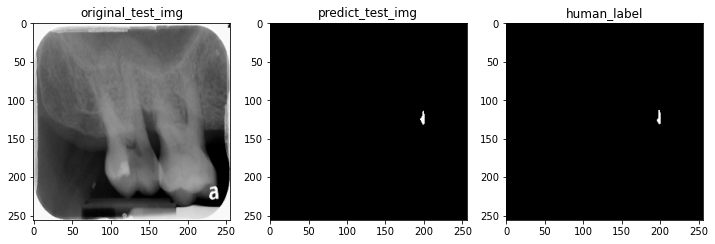

 87%|█████████████████████████████████████████████████████████████████████▍          | 105/121 [00:29<00:04,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190826_153152_C055CA.PNG
(256, 256, 3)


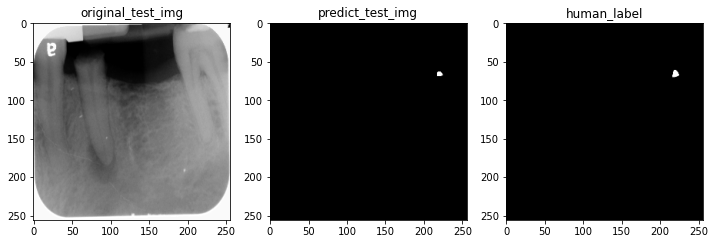

 88%|██████████████████████████████████████████████████████████████████████          | 106/121 [00:30<00:04,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190911_161735_4C085.PNG
(256, 256, 3)


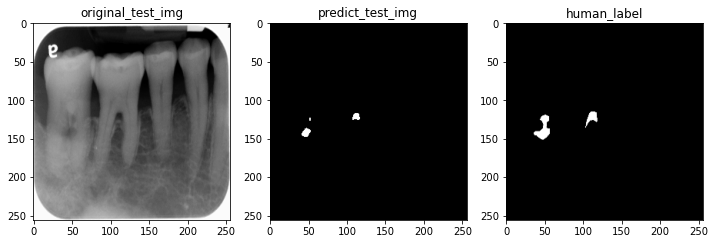

 88%|██████████████████████████████████████████████████████████████████████▋         | 107/121 [00:30<00:04,  3.41it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190911_161803_4C094.PNG
(256, 256, 3)


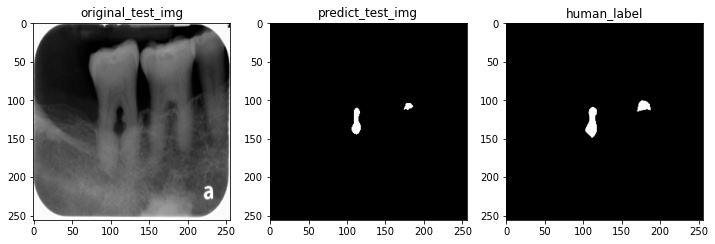

 89%|███████████████████████████████████████████████████████████████████████▍        | 108/121 [00:30<00:03,  3.32it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190911_161812_4C098.PNG
(256, 256, 3)


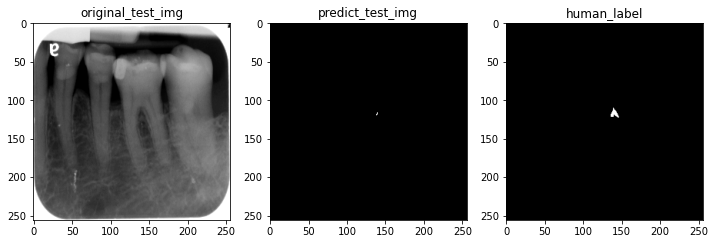

 90%|████████████████████████████████████████████████████████████████████████        | 109/121 [00:31<00:03,  3.37it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190911_161859_4C090.PNG
(256, 256, 3)


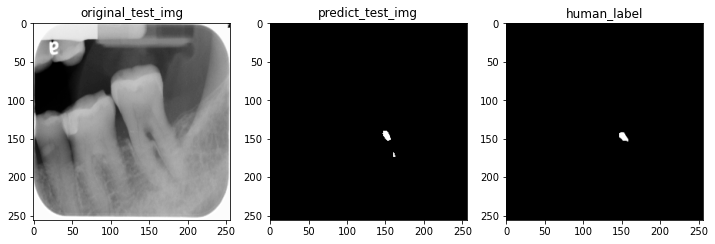

 91%|████████████████████████████████████████████████████████████████████████▋       | 110/121 [00:31<00:03,  3.44it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190912_105620_4C33F.PNG
(256, 256, 3)


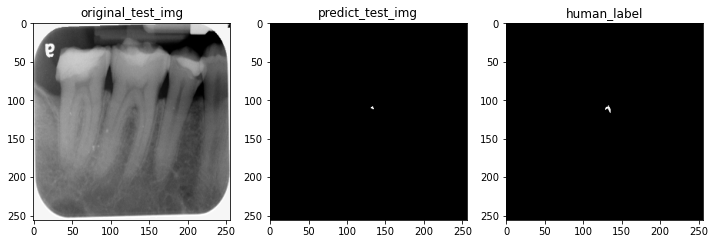

 92%|█████████████████████████████████████████████████████████████████████████▍      | 111/121 [00:31<00:02,  3.51it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190912_105714_4C33C.PNG
(256, 256, 3)


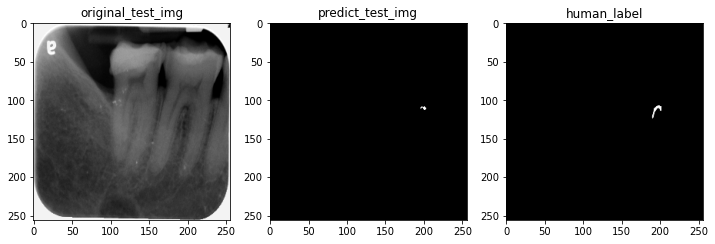

 93%|██████████████████████████████████████████████████████████████████████████      | 112/121 [00:31<00:02,  3.54it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190912_105721_4C345.PNG
(256, 256, 3)


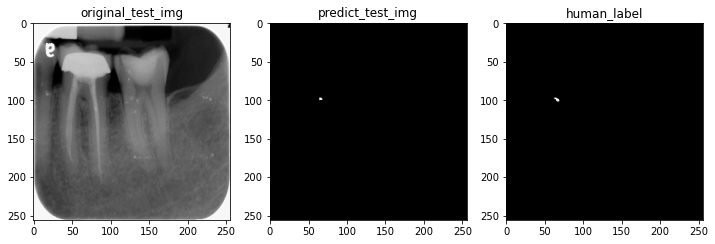

 93%|██████████████████████████████████████████████████████████████████████████▋     | 113/121 [00:32<00:02,  3.58it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_190923_113436_4B14C.PNG
(256, 256, 3)


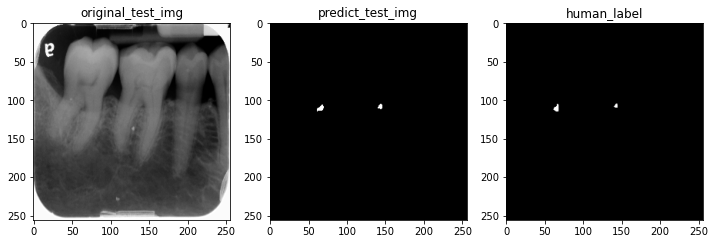

 94%|███████████████████████████████████████████████████████████████████████████▎    | 114/121 [00:32<00:01,  3.60it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191010_153103_4AFFB.PNG
(256, 256, 3)


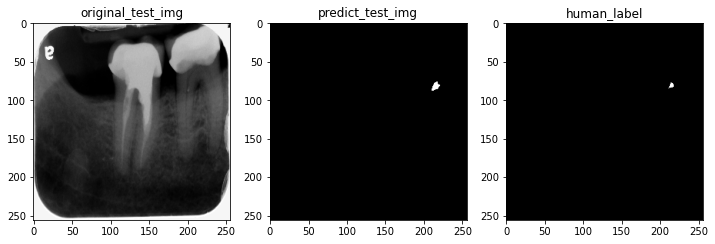

 95%|████████████████████████████████████████████████████████████████████████████    | 115/121 [00:32<00:01,  3.61it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191010_153145_4AFFF.PNG
(256, 256, 3)


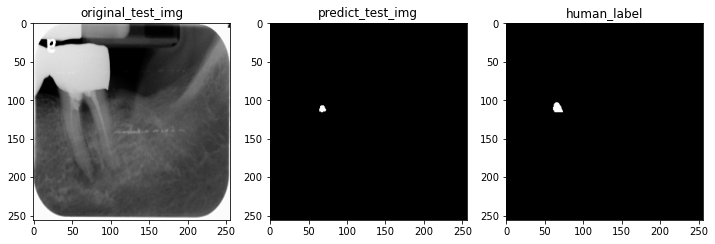

 96%|████████████████████████████████████████████████████████████████████████████▋   | 116/121 [00:33<00:01,  3.38it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191016_135354_BEF7E0.PNG
(256, 256, 3)


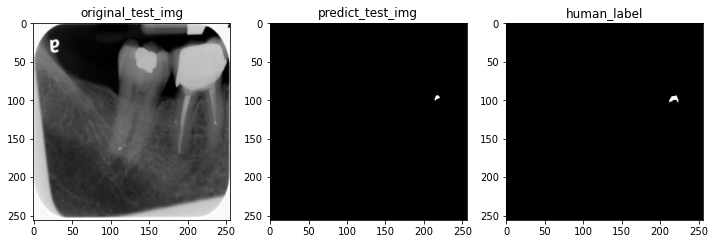

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 117/121 [00:33<00:01,  3.21it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191111_154607_BD6DCA.PNG
(256, 256, 3)


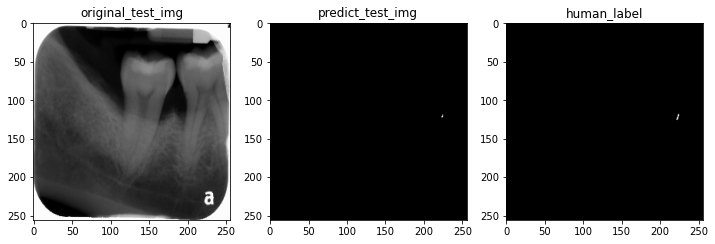

 98%|██████████████████████████████████████████████████████████████████████████████  | 118/121 [00:33<00:00,  3.33it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191111_154608_BD6DCC.PNG
(256, 256, 3)


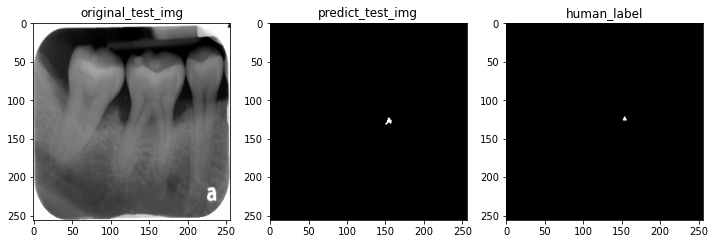

 98%|██████████████████████████████████████████████████████████████████████████████▋ | 119/121 [00:33<00:00,  3.40it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191111_154710_BD6DEA.PNG
(256, 256, 3)


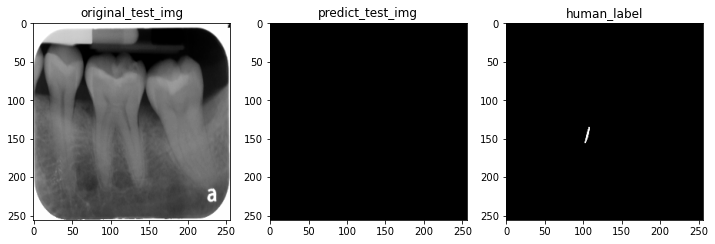

 99%|███████████████████████████████████████████████████████████████████████████████▎| 120/121 [00:34<00:00,  3.49it/s]

D:/Lab/PBL/buccal/buccal_furcation_train/label/ NN_191111_154711_BD6DEC.PNG
(256, 256, 3)


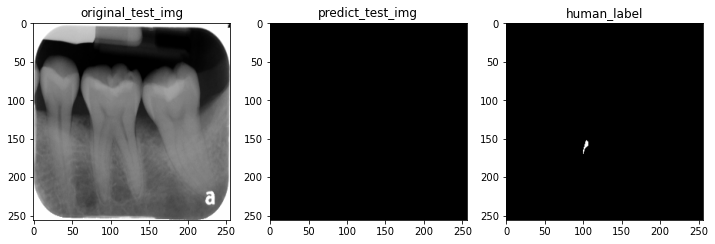

100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:34<00:00,  3.50it/s]


In [7]:
#show testing result
import os
import cv2
import skimage.io as io
import skimage.transform as trans
import matplotlib.pyplot as plt

test_folder = "D:/Lab/PBL/buccal/buccal_furcation_train/image/"
result_folder = "D:/Lab/PBL/buccal/buccal_furcation_train/result/"
label_folder = "D:/Lab/PBL/buccal/buccal_furcation_train/label/"

#test_img_path_list = glob.glob(test_folder+'/*/*.PNG')
test_folder_list = [f for f in os.listdir(test_folder) if f.endswith('.PNG')]

#for img_path in tqdm(test_img_path_list, total = len(test_img_path_list)):
for img_path in tqdm(test_folder_list, total = len(test_folder_list)):
    #img = cv2.imread(img_path,0)
    
    img = cv2.imread(test_folder + img_path,0)
    
    #predict_img = cv2.imread(img_path.replace(test_folder,result_folder),0)
    predict_img = cv2.imread(result_folder+img_path,0)
    print(label_folder, img_path.split('/')[-1])
    plt.figure(figsize = (12,12))
    if os.path.exists(os.path.join(label_folder, img_path.split('/')[-1])):
        human_label = io.imread(os.path.join(label_folder, img_path.split('/')[-1]))
        plt.subplot(133)
        plt.title('human_label')
        print(human_label.shape)
        plt.imshow(human_label)
    else:
        human_label = np.zeros((img.shape[0], img.shape[1]), dtype = 'float32')
        plt.subplot(133)
        plt.title('This is zero matrix')
        plt.imshow(human_label, cmap='gray')
    human_label = io.imread
    plt.subplot(131)
    plt.title('original_test_img')
    plt.imshow(img, cmap='gray')
    plt.subplot(132)
    plt.title('predict_test_img')
    plt.imshow(predict_img, cmap='gray')
    plt.show()

In [16]:
# import cv2
# import matplotlib.pyplot as plt
# nums = 2

# img_name = file_list[nums].split('/')[-1].split('.')[0]
# print(img_name)
# original_image = cv2.imread('/home/jingping/aiforge/tooth_countour/tooth_PBL_detection/Processing_dir/resize_256/NN_130821_152420_C0353A.PNG')
# predict_mask = cv2.imread('/home/jingping/aiforge/tooth_countour/tooth_PBL_detection/Processing_dir/roots_unet_mask/NN_130821_152420_C0353A.png')
# #img = cv2.resize(img,(256,256))
# #cv2.imwrite('/root/notebooks/0858611-2/unet/unet/data/membrane/3011.png',img)
# print(original_image.shape)
# print(predict_mask.shape)

# predict_mask = cv2.resize(predict_mask,(original_image.shape[1],original_image.shape[0]),interpolation=cv2.INTER_CUBIC)
# predict_mask = predict_mask
# add_image = cv2.add(original_image,predict_mask)

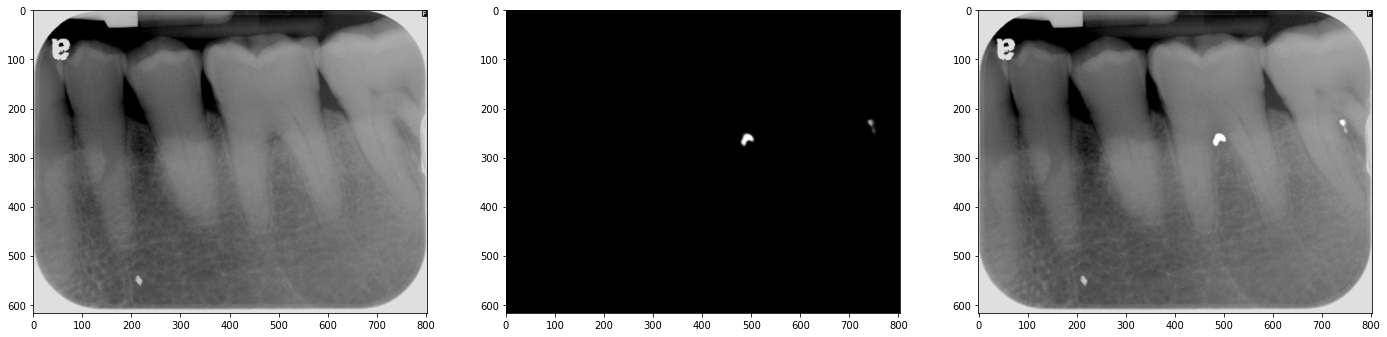

In [17]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(original_image)
plt.subplot(1,3,2)
plt.imshow(predict_mask)
plt.subplot(1,3,3)
plt.imshow(add_image)

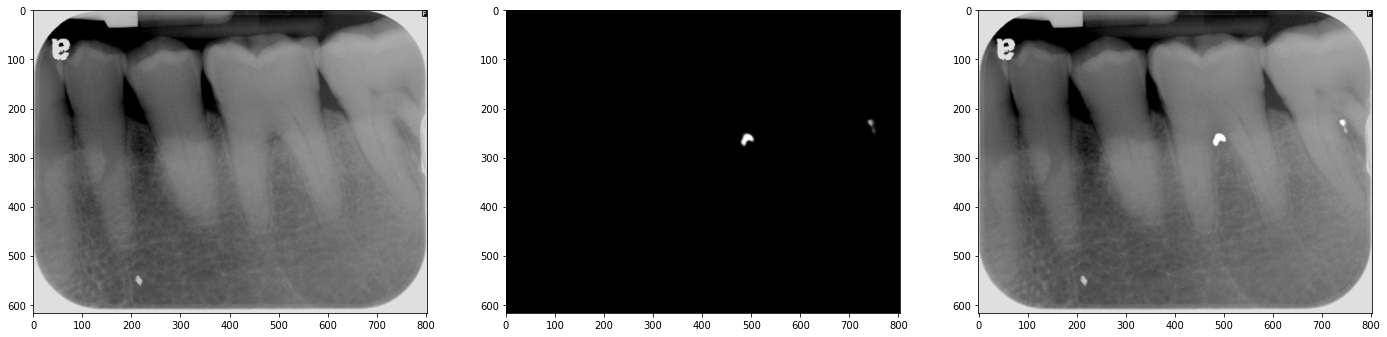

In [18]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(original_image)
plt.subplot(1,3,2)
plt.imshow(predict_mask)
plt.subplot(1,3,3)
plt.imshow(add_image)

In [32]:
# import os 
# import cv2
# import shutil
# import numpy as np
# import matplotlib.pyplot as plt

# path = '/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/Furcation_Mseeh/train/doctor_label'
# result_path = '/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/Furcation_Mseeh/train/label'

# for file_name in os.listdir(path):
#     print(file_name.split(' ')[0])
#     img = cv2.imread(os.path.join(path, file_name))
#     img = to_Furcation_Mseeh_mask(img)
#     cv2.imwrite(result_path+'/{}'.format(file_name.split(' ')[0])+'.PNG',img)
#     if os.path.isdir(os.path.join(path, file_name)):
#         print(os.path.join(path, file_name))
#         #shutil.rmtree(os.path.join(path, file_name))

In [33]:
# def to_Furcation_Mseeh_mask(img):
#     black = np.array([0, 0, 0])
#     gray = np.array([1, 1, 1])
#     white = np.array([255, 255, 255])

#     r = np.array([36, 28, 237])
#     g = np.array([0, 1, 0])
#     b = np.array([0, 0, 1])
    
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             if (img[i][j] == r).sum() == 3:
#                 img[i][j] = white
#             else:
#                 img[i][j] = black
#     return img
# def show_pixel_set(img_nparray):
#     a = img_nparray
#     unique, counts = np.unique(a, return_counts=True)
#     return dict(zip(unique, counts))

# def pixel_value2category(img_nparray):
#     my_dict = show_pixel_set(img_nparray)
#     for index, clas in enumerate(my_dict):
#         img_nparray = np.where(img_nparray == clas, index, img_nparray)
#     return img_nparray